### project test data

In [1]:
import glob
import os

In [2]:
import tensorflow as tf

In [3]:
#model load
from tensorflow.keras.models import load_model


In [4]:
model = load_model("model.h5")

2023-10-18 15:54:49.517554: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-18 15:54:49.674857: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-18 15:54:49.675111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-18 15:54:49.676635: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [12]:
# import glob'/home/computer520/DL_project/data/one_picture/8.jpg'
# image = glob.glob()

In [8]:
import cv2

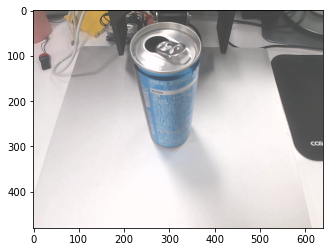

In [37]:
import matplotlib.pyplot as plt

image = cv2.imread('/home/computer520/Documents/opencv_study/capture/cap.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [20]:
import cv2
import numpy as np

# 이미지를 읽어옵니다.
image = cv2.imread('/home/computer520/Documents/opencv_study/capture/cap.png')

# 이미지를 RGB 포맷으로 변환합니다.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 모델의 입력 크기에 맞게 이미지를 resize합니다.
target_size = (150, 150)
resized_image = cv2.resize(image, target_size)

# 모델에 전달할 수 있는 형태로 이미지를 가공합니다.
resized_image = resized_image / 255.0  # 이미지를 [0, 1] 범위로 정규화 (가장 일반적인 경우)

result = model.predict(resized_image[np.newaxis, ...])
print(result)

rate_c = result[0][0]
rate_g = result[0][1]
rate_p = result[0][2]

if rate_c > rate_g and rate_c > rate_p :
    predicted_result = 3
elif rate_g > rate_p and rate_g > rate_c :
    predicted_result = 4
elif rate_p > rate_g and rate_p > rate_c :
    predicted_result = 5
else:
    predicted_result = 0

if predicted_result == 3:
    print('This object is can.')
elif predicted_result == 4:
    print('This object is glass.')
elif predicted_result == 5:
    print('This object is plastic.')

with open('/home/computer520/DL_project/result/data.txt','w') as f:
    f.write(str(predicted_result))

[[9.99199569e-01 7.88367994e-04 1.20013465e-05]]
This object is can.
